# Bayes's Theorem

The principal idea of Bayes's Theorem is one of conditional probabilities:

A = the prior event (the thing that happens first)

B = the posterior event (the thing that happens second, and may depend on A)

P(A|B) = probability that the prior condition existed, given an occurrence of the second event

Bayes's Theorem states that:

\begin{equation}
P(A|B) = \frac{P(B|A) \times P(A)}{P(B|A) \times P(A) + P(B|\tilde A) \times P(\tilde A)}
\end{equation}



In [1]:
import matplotlib.pyplot as plt

def draw_bayes_rectangle(pa, pba, pbnota):
    
    true_positive_rate = pa*pba
    false_positive_rate = (1-pa)*pbnota
    true_negative_rate = (1-pa)*(1-pbnota)
    false_negative_rate = pa*(1-pba)
    
    print("True Positive Rate: %0.1f percent" % (true_positive_rate*100.0))
    print("False Positive Rate: %0.1f percent" % (false_positive_rate*100.0))
    print("True Negative Rate: %0.1f percent" % (true_negative_rate*100.0))
    print("False Negative Rate: %0.1f percent" % (false_negative_rate*100.0))
    x = []
    y = []
    x.append(0)
    y.append(0)
    x.append(1)
    y.append(0)
    x.append(1)
    y.append(1)
    x.append(0)
    y.append(1)
    x.append(0)
    y.append(0)
    plt.plot(x,y,'r-')
    u = []
    v = []
    u.append(pa)
    v.append(0)
    u.append(pa)
    v.append(1)
    plt.plot(u,v,'r-')
    r = []
    s = []
    r.append(0)
    s.append(0)
    r.append(0)
    s.append(pba)
    r.append(pa)
    s.append(pba)
    r.append(pa)
    s.append(0)
    r.append(0)
    s.append(0)
    plt.plot(r,s,'g-')
    nlines = int(100*pba)
    for i in range(nlines):
        m = []
        n = []
        #print (pba*float(i+1)/nlines)
        m.append(0)
        n.append(pba*float(i+1)/nlines)
        m.append(pa)
        n.append(pba*float(i+1)/nlines)
        plt.plot(m,n,'g-')
    r = []
    s = []
    r.append(pa)
    s.append(0)
    r.append(pa)
    s.append(pbnota)
    r.append(1)
    s.append(pbnota)
    r.append(1)
    s.append(0)
    r.append(pa)
    s.append(0)
    plt.plot(r,s,'b-')
    nlines = int(100*pbnota)
    for i in range(nlines):
        m = []
        n = []
        #print (pbnota*float(i+1)/nlines)
        m.append(pa)
        n.append(pbnota*float(i+1)/nlines)
        m.append(1)
        n.append(pbnota*float(i+1)/nlines)
        plt.plot(m,n,'b-')

In [2]:
# Example 1:  Breast Cancer rates
#
# The probability of a person having breast cancer in the population = 0.01
# The probability of a true positive (i.e. a person has breast cancer, and the test returns a positive result) = 0.90
# The probability of a false positive (i.e. a person does NOT have breast cancer, but there is a positive result) = 0.08
# 
# A = the person has breast cancer (prior to the test)
# B = positive test result

P_A = 0.01
P_B_given_A = 0.90
P_B_given_not_A = 0.08

P_not_A = 1.0 - P_A

P_A_given_B = (P_B_given_A * P_A)/(P_B_given_A * P_A + P_B_given_not_A * P_not_A)

print("The probability of a person having breast cancer, given a positive test result, is %0.3f" %P_A_given_B)

# Next question:  what is the probability that the person does NOT have breast cancer, given a positive test result?

P_not_A_given_B = 1.0 - P_A_given_B

print("The probability of a person NOT having breast cancer, given a positive test result, is %0.3f" %P_not_A_given_B)

# Next question:  what is the probability that the person has breast cancer, given a negative test result? This is a bit trickier ... and quite worrisome, right?  I mean, we do NOT want to miss this diagnosis!

P_B_given_not_A = 1.0 - P_B_given_A

P_A_given_not_B = (P_B_given_not_A * P_A)/(P_B_given_not_A * P_A + P_B_given_A * P_not_A)

print("The probability of a person having breast cancer, given a negative test result, is %0.3f" %P_A_given_not_B)

# Next question:  what is the probability that the person does NOT have breast cancer, given a negative test result?

P_not_A_given_not_B = 1.0 - P_A_given_not_B

print("The probability of a person NOT having breast cancer, given a negative test result, is %0.3f" %P_not_A_given_not_B)

print("Summary: we sacrifice the higher probability of false positives in order to reduce the probability of false negatives.  This is emotionally difficult for the person that gets a false positive, but it is the right thing to do.")

The probability of a person having breast cancer, given a positive test result, is 0.102
The probability of a person NOT having breast cancer, given a positive test result, is 0.898
The probability of a person having breast cancer, given a negative test result, is 0.001
The probability of a person NOT having breast cancer, given a negative test result, is 0.999
Summary: we sacrifice the higher probability of false positives in order to reduce the probability of false negatives.  This is emotionally difficult for the person that gets a false positive, but it is the right thing to do.


True Positive Rate: 0.9 percent
False Positive Rate: 9.9 percent
True Negative Rate: 89.1 percent
False Negative Rate: 0.1 percent


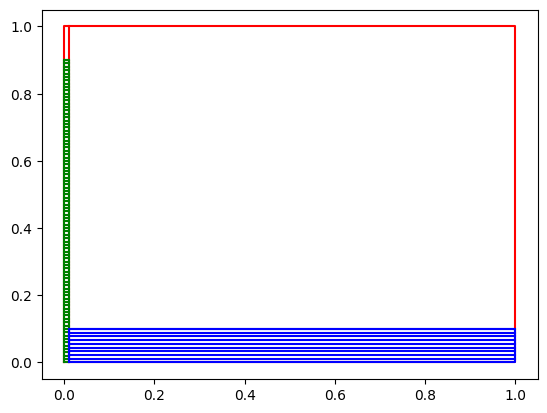

In [3]:
draw_bayes_rectangle(P_A, P_B_given_A, P_B_given_not_A)

In [4]:
# Example 2:  Vaccine Effectiveness
#
# The probability of a person being vaccinated, given that they have COVID = 0.200 
# The vaccination rate is 70%
# 
# A = the person was vaccinated (prior to getting COVID)
# B = person is susceptible to getting COVID
#
# P_A_given_B = (P_B_given_A * P_A)/(P_B_given_A * P_A + P_B_given_not_A * P_not_A)
#
# Rearranging and solving for P_B_given_A:
# 
# P_B_given_A = P_B_given_not_A * P_not_A * P_A_given_B / (P_A * (1.0 - P_A_given_B))

P_A_given_B = 0.200  # probability that person was vaccinated, given that they are susceptible to COVID
P_A = 0.70 #probability that person was vaccinated

P_not_A = 1.0 - P_A
P_B_given_not_A = 1.0 # probability that person is susceptible to gettting COVID, given they were NOT vaccinated.

P_B_given_A = P_B_given_not_A * P_not_A * P_A_given_B / (P_A * (1.0 - P_A_given_B))

print("The probability of a person getting COVID, given a previous vaccination, is %0.3f" %P_B_given_A)

print("Thus, the vaccine effectiveness is %0.3f" %(1.0-P_B_given_A))

The probability of a person getting COVID, given a previous vaccination, is 0.107
Thus, the vaccine effectiveness is 0.893


True Positive Rate: 7.5 percent
False Positive Rate: 30.0 percent
True Negative Rate: 0.0 percent
False Negative Rate: 62.5 percent


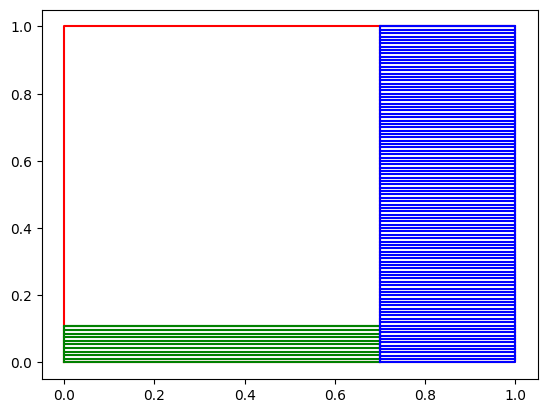

In [5]:
draw_bayes_rectangle(P_A, P_B_given_A, P_B_given_not_A)

The probability of a person having breast cancer, given a first positive test result, is 0.102
The probability of a person having breast cancer, given a second positive test result, is 0.561
True Positive Rate: 9.2 percent
False Positive Rate: 7.2 percent
True Negative Rate: 82.6 percent
False Negative Rate: 1.0 percent


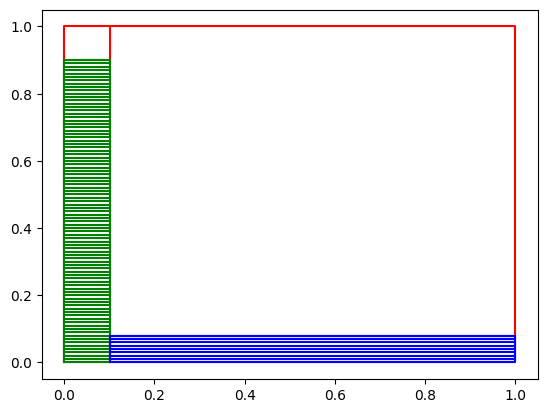

In [6]:
# Example 3:  Breast Cancer rates, again
#
# Suppose that the first test comes back positive ... let's consider having a SECOND test  ... and maybe a third test.
#
# The probability of a person having breast cancer, in the general population = 0.01
# The probability of a true positive (i.e. a person has breast cancer, and the second test returns a positive result) = 0.90
# The probability of a false positive (i.e. a person does NOT have breast cancer, but there is a second positive result) = 0.08
# 
# A = the person has breast cancer (prior to the test)
# B = positive test result


# First test
P_A = 0.01
P_B_given_A = 0.90
P_B_given_not_A = 0.08

P_not_A = 1.0 - P_A

P_A_given_B = (P_B_given_A * P_A)/(P_B_given_A * P_A + P_B_given_not_A * P_not_A)

print("The probability of a person having breast cancer, given a first positive test result, is %0.3f" %P_A_given_B)

# Second Test
P_A = P_A_given_B # set equal to probability of actually having cancer, as determined from first test
P_not_A = 1.0 - P_A

P_A_given_B = (P_B_given_A * P_A)/(P_B_given_A * P_A + P_B_given_not_A * P_not_A)

print("The probability of a person having breast cancer, given a second positive test result, is %0.3f" %P_A_given_B)

draw_bayes_rectangle(P_A, P_B_given_A, P_B_given_not_A)

In [7]:
# Third Test
P_A = P_A_given_B # set equal to probability of actually having cancer, as determined from second test
P_not_A = 1.0 - P_A

P_A_given_B = (P_B_given_A * P_A)/(P_B_given_A * P_A + P_B_given_not_A * P_not_A)

print("The probability of a person having breast cancer, given a third positive test result, is %0.3f" %P_A_given_B)

The probability of a person having breast cancer, given a third positive test result, is 0.935


True Positive Rate: 50.5 percent
False Positive Rate: 3.5 percent
True Negative Rate: 40.4 percent
False Negative Rate: 5.6 percent


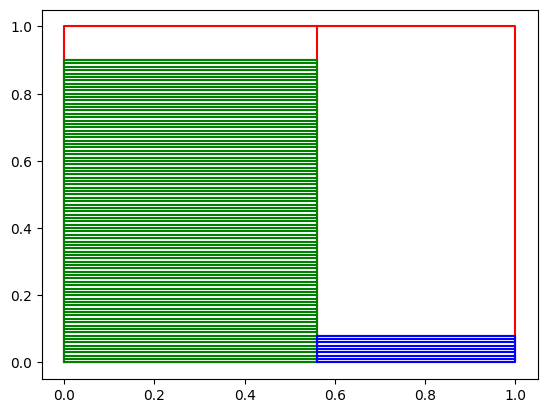

In [8]:
draw_bayes_rectangle(P_A, P_B_given_A, P_B_given_not_A)

In [17]:
# Example 1:  Liver Disease rates
#
# The probability of a person having liver disease in the population = 0.0025 = PA
# The probability of a person being an alcoholic = 0.06 = PB
# The probability of a person being an alcoholic, given that they have liver disease = 0.85 = PBA

P_A = 0.0025
P_B_given_A = 0.85
P_B = 0.06

P_not_A = 1.0 - P_A

P_A_given_B = (P_B_given_A * P_A)/P_B

print("The probability of a person having liver disease, given that they are an alcoholic, is %0.2f percent" %(P_A_given_B*100))

# Next question:  what is the probability that the person does NOT have liver disease, given they are an alcoholic?

P_not_A_given_B = 1.0 - P_A_given_B

print("The probability of a person NOT having liver disease, given they are an alcholic, is %0.2f percent" %(P_not_A_given_B*100))

P_B_given_not_A = 1.0 - P_B_given_A

P_A_given_not_B = (P_B_given_not_A * P_A)/(P_B_given_not_A * P_A + P_B_given_A * P_not_A)

print("The probability of a person having liver disease, given they are NOT an alcholic, is %0.2f percent" %(P_A_given_not_B*100))

# Next question:  what is the probability that the person does NOT have liver disease, given they are an alcholic?

P_not_A_given_not_B = 1.0 - P_A_given_not_B

print("The probability of a person NOT having liver disease, given they are not alcholic, is %0.2f percent" % (P_not_A_given_not_B*100))

The probability of a person having liver disease, given that they are an alcoholic, is 3.54 percent
The probability of a person NOT having liver disease, given they are an alcholic, is 96.46 percent
The probability of a person having liver disease, given they are NOT an alcholic, is 0.04 percent
The probability of a person NOT having liver disease, given they are not alcholic, is 99.96 percent


True Positive Rate: 0.2 percent
False Positive Rate: 15.0 percent
True Negative Rate: 84.8 percent
False Negative Rate: 0.0 percent


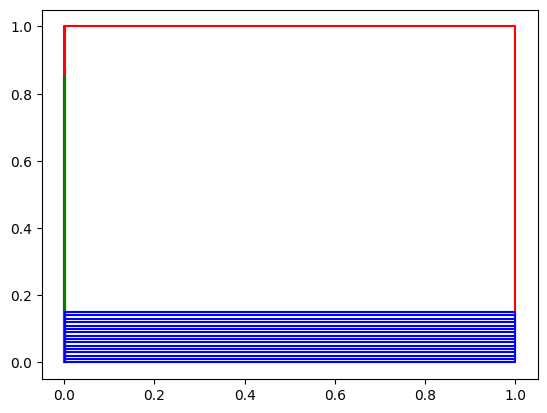

In [10]:
draw_bayes_rectangle(P_A, P_B_given_A, P_B_given_not_A)